In [5]:
import pandas as pd

import numpy as np

df = pd.read_csv('data/Advertising And Sales.csv')

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


(None,
    ID     TV  Radio  Newspaper  Sales
 0   1  230.1   37.8       69.2   22.1
 1   2   44.5   39.3       45.1   10.4
 2   3   17.2   45.9       69.3    9.3
 3   4  151.5   41.3       58.5   18.5
 4   5  180.8   12.8       58.4   12.9)

In [9]:
print(df.describe())

               ID          TV      Radio   Newspaper     Sales
count  200.000000  200.000000  200.00000  200.000000  200.0000
mean   100.500000  147.032500   23.28950   30.554000   14.0380
std     57.879185   85.885186   14.86997   21.778621    5.2094
min      1.000000    0.700000    0.00000    0.300000    1.6000
25%     50.750000   74.375000   10.07500   12.750000   10.4000
50%    100.500000  149.750000   22.90000   25.750000   12.9000
75%    150.250000  218.825000   36.52500   45.100000   17.4000
max    200.000000  296.400000   49.60000  114.000000   27.0000


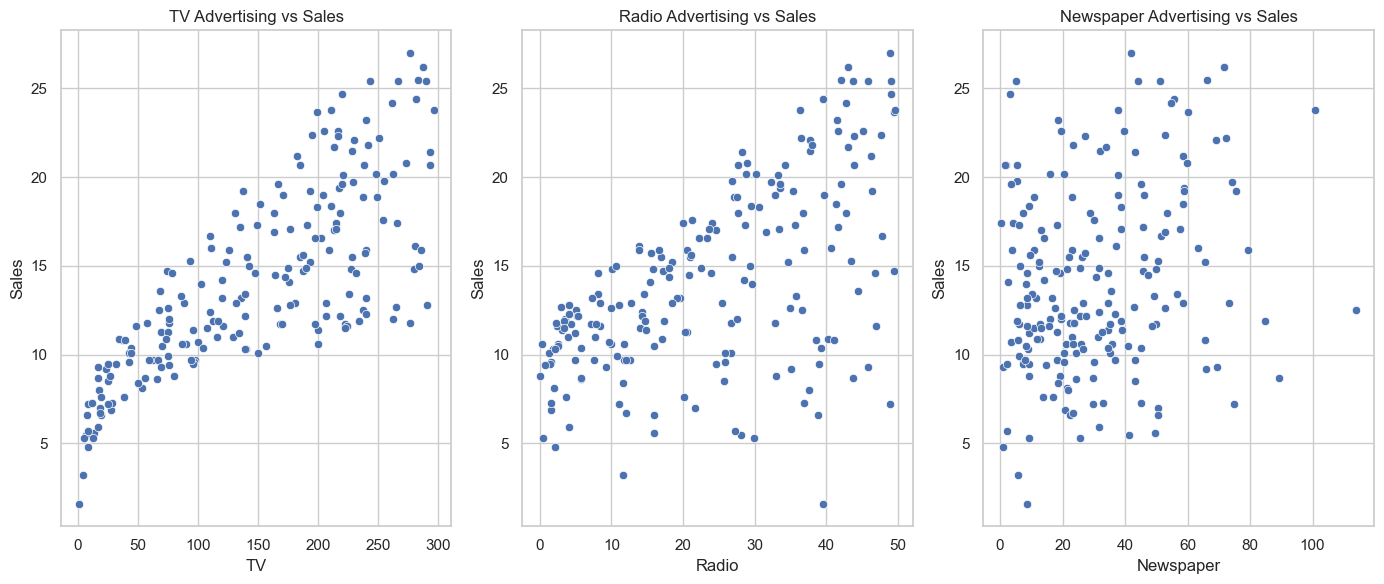

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Scatter plots to visualize relationships
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV Advertising vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio Advertising vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper Advertising vs Sales')

plt.tight_layout()
plt.show()

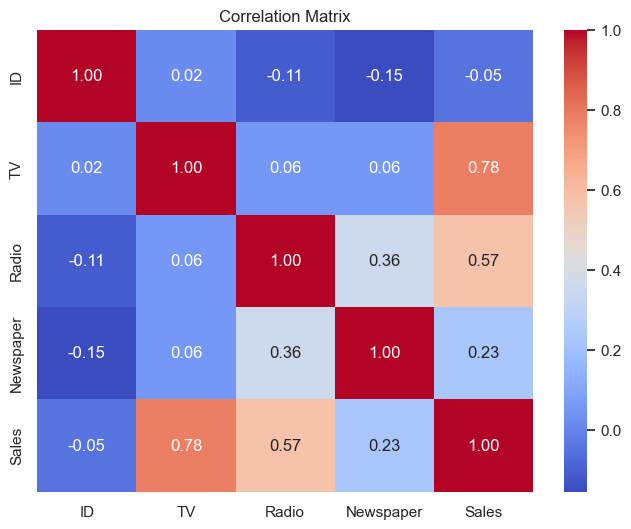

In [14]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [15]:
    from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

# Display coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 3.1573345916468663
R^2 Score: 0.899969103117516
           Coefficient
TV            0.044633
Radio         0.187330
Newspaper     0.002429


In [16]:
# Calculate ROI for each channel
def calculate_roi(spend, sales):
    return sales / spend if spend != 0 else 0

# Compute ROI for each advertising channel
df['TV_ROI'] = df.apply(lambda row: calculate_roi(row['TV'], row['Sales']), axis=1)
df['Radio_ROI'] = df.apply(lambda row: calculate_roi(row['Radio'], row['Sales']), axis=1)
df['Newspaper_ROI'] = df.apply(lambda row: calculate_roi(row['Newspaper'], row['Sales']), axis=1)

# Display the first few rows with ROI
print(df[['TV_ROI', 'Radio_ROI', 'Newspaper_ROI']].head())

     TV_ROI  Radio_ROI  Newspaper_ROI
0  0.096045   0.584656       0.319364
1  0.233708   0.264631       0.230599
2  0.540698   0.202614       0.134199
3  0.122112   0.447942       0.316239
4  0.071350   1.007812       0.220890


### Using MLP

In [30]:
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv('data/Advertising And Sales.csv')

# Check dataset information and statistics
df.info(), df.head()

print(df.describe())

# Split features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create MLP model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(16, activation='relu'))  # Third hidden layer

# Output layer
model.add(Dense(1))  # Output layer (regression, so no activation function)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions on test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'tensorflow'